# ITS307 Data Analytics : Spring Semester 2022
# Assignment 2
# Supervised Learning - Linear Regression


# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Importing Libraries </li>
<li> Loading and Cleaning with Pandas</li>
<li> EDA  </li>
<li> Feature Engineering  </li>
<li> Training Model</li>
<li> Predicting</li>
<li> Evaluating Model</li>

</ol>

# Learning Objectives

Second-hand car have huge market base. Many consider to buy a Used Car intsead of buying of new one, as it's is feasible and a better investment.

The dataset shared contains some of the features that determines the second hand car's price in India. Some of the features of are:
- Name: The brand and model of the car
- Location: The location in which the car is being sold or is available for purchase.
- Year: Year or edition of the model
- Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM
- Fuel_Type: The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car. (Automatic / Manual)
- Owner_Type: Whether the owner is first owner or second owner and so on.
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC.
- Power:
- Seat: Number of the seat of car
- New_Price: Price of the car when its new/first hand
- Price (Target) : Price of the used car


# 1. Loading Libraries

In [1548]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [1549]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

# 2. Loading and Cleaning with Pandas

In [1550]:
train_df = pd.read_csv('train-data.csv')
test_df = pd.read_csv('test-data.csv')

In [1551]:
train_df.shape

(6019, 14)

In [1552]:
train_df.head()

Unnamed: 0                              Name    Location  Year  \
0           0            Maruti Wagon R LXI CNG      Mumbai  2010   
1           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2           2                      Honda Jazz V     Chennai  2011   
3           3                 Maruti Ertiga VDI     Chennai  2012   
4           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  
0  58.16 bhp    5.0        NaN   1.75  
1  126.2 bhp    5.0        NaN  12.50  
2   88.7 bhp    5.0  8.61 Lakh   4.50  
3  88.76 bhp    7.0        NaN   6.00  
4  140.8 bhp    5.0        NaN  17.74

In [1553]:
train_df.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [1554]:
train_df = train_df.drop(['New_Price','Unnamed: 0'], axis=1)
train_df.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0       CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp    5.0   
1    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp    5.0   
2    Petrol       Manual      First   18.2 kmpl  1199 CC   88.7 bhp    5.0   
3    Diesel       Manual      First  20.77 kmpl  1248 CC  88.76 bhp    7.0   
4    Diesel    Automatic     Second   15.2 kmpl  1968 CC  140.8 bhp    5.0   

   Price  
0   1.75  
1  12.50  
2   4.50  
3   6.00  
4  17.74

In [1555]:
train_df['Mileage']=train_df['Mileage'].str.replace('km/kg', ' ')
train_df['Mileage']=train_df['Mileage'].str.replace('kmpl', ' ')
train_df['Engine']=train_df['Engine'].str.replace('CC', ' ')
train_df['Power']=train_df['Power'].str.replace('bhp', ' ')
train_df

Name    Location  Year  Kilometers_Driven  \
0               Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                         Honda Jazz V     Chennai  2011              46000   
3                    Maruti Ertiga VDI     Chennai  2012              87000   
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   
...                                ...         ...   ...                ...   
6014                  Maruti Swift VDI       Delhi  2014              27365   
6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015             100000   
6016             Mahindra Xylo D4 BSIV      Jaipur  2012              55000   
6017                Maruti Wagon R VXI     Kolkata  2013              46000   
6018             Chevrolet Beat Diesel   Hyderabad  2011              47000   

     Fuel_Type Transmission Owner_Type  Mileage  Engine    Power  Seats  Price  
0          CNG       Manual      First   26.6     998    58.16      5.0   1.75  
1       Diesel       Manual      First  19.67    1582    126.2      5.0  12.50  
2       Petrol       Manual      First   18.2    1199     88.7      5.0   4.50  
3       Diesel       Manual      First  20.77    1248    88.76      7.0   6.00  
4       Diesel    Automatic     Second   15.2    1968    140.8      5.0  17.74  
...        ...          ...        ...      ...     ...      ...    ...    ...  
6014    Diesel       Manual      First   28.4    1248       74      5.0   4.75  
6015    Diesel       Manual      First   24.4    1120       71      5.0   4.00  
6016    Diesel       Manual     Second   14.0    2498      112      8.0   2.90  
6017    Petrol       Manual      First   18.9     998     67.1      5.0   2.65  
6018    Diesel       Manual      First  25.44     936     57.6      5.0   2.50  

[6019 rows x 12 columns]

In [1556]:
train_df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

In [1557]:
train_df.astype({'Mileage': 'float'}).dtypes
train_df.astype({'Engine': 'float'}).dtypes
train_df['Power'] = pd.to_numeric(train_df['Power'], errors='coerce')
train_df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                float64
Seats                float64
Price                float64
dtype: object

In [1558]:
print(train_df.Mileage.mode())
print(train_df.Engine.mode())
print(train_df.Power.mode())
print(train_df.Seats.mode())

0    17.0  
dtype: object
0    1197  
dtype: object
0    74.0
dtype: float64
0    5.0
dtype: float64


In [1559]:
train_df['Mileage'].fillna(value = 17.0, inplace=True)
train_df['Engine'].fillna(value = 1197.0, inplace=True)
train_df['Power'].fillna(value = 74.0, inplace=True)
train_df['Seats'].fillna(value = 5.0, inplace=True)

In [1560]:
train_df.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [1561]:
test_df.duplicated().sum()

0

In [1562]:
train_df['Name'].nunique()

1876

In [1563]:
train_df['Brand'] = train_df['Name'].str.split(' ').str[0]
train_df = train_df.drop('Name', axis=1)
train_df.groupby('Brand').nunique()

Location  Year  Kilometers_Driven  Fuel_Type  Transmission  \
Brand                                                                       
Ambassador            1     1                  1          1             1   
Audi                 11    12                180          2             1   
BMW                  11    14                190          2             1   
Bentley               1     1                  1          1             1   
Chevrolet            11    15                107          2             2   
Datsun                7     3                 12          1             1   
Fiat                  9    11                 26          2             1   
Force                 2     1                  2          1             1   
Ford                 11    17                237          2             2   
Honda                11    19                415          2             2   
Hyundai              11    19                713          4             2   
ISUZU                 2     2                  2          1             1   
Isuzu                 1     1                  1          1             1   
Jaguar                9     8                 39          2             1   
Jeep                  7     3                 15          2             2   
Lamborghini           1     1                  1          1             1   
Land                 10    12                 54          2             2   
Mahindra             11    17                218          3             2   
Maruti               11    22                771          4             2   
Mercedes-Benz        11    19                231          2             2   
Mini                 11     8                 24          2             2   
Mitsubishi           10    13                 26          2             2   
Nissan               11    10                 80          2             2   
Porsche               7     8                 18          2             2   
Renault              11     9                118          2             2   
Skoda                11    17                141          2             2   
Smart                 1     1                  1          1             1   
Tata                 11    17                150          3             2   
Toyota               11    19                307          4             2   
Volkswagen           11    12                224          2             2   
Volvo                 9     8                 20          1             2   

               Owner_Type  Mileage  Engine  Power  Seats  Price  
Brand                                                            
Ambassador              1        1       1      1      1      1  
Audi                    3       38      11     29      5    166  
BMW                     3       46       9     26      4    182  
Bentley                 1        1       1      1      1      1  
Chevrolet               3       25      11     25      6     80  
Datsun                  1        5       2      4      2     12  
Fiat                    3       12       5     13      1     23  
Force                   1        1       2      2      1      2  
Ford                    4       40      16     33      3    178  
Honda                   3       52      11     28      2    273  
Hyundai                 4       73      22     49      2    439  
ISUZU                   1        1       1      1      1      2  
Isuzu                   1        1       1      1      1      1  
Jaguar                  2       10       4     10      3     35  
Jeep                    1        3       2      2      1     14  
Lamborghini             1        1       1      1      1      1  
Land                    2       17       6     14      3     56  
Mahindra                3       30      14     23      5    184  
Maruti                  4       81      18     52      4    397  
Mercedes-Benz           3       43      15     48      4    219  
Mini                 

In [1564]:
train_df.head()

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0      Mumbai  2010              72000       CNG       Manual      First   
1        Pune  2015              41000    Diesel       Manual      First   
2     Chennai  2011              46000    Petrol       Manual      First   
3     Chennai  2012              87000    Diesel       Manual      First   
4  Coimbatore  2013              40670    Diesel    Automatic     Second   

   Mileage  Engine   Power  Seats  Price    Brand  
0   26.6     998     58.16    5.0   1.75   Maruti  
1  19.67    1582    126.20    5.0  12.50  Hyundai  
2   18.2    1199     88.70    5.0   4.50    Honda  
3  20.77    1248     88.76    7.0   6.00   Maruti  
4   15.2    1968    140.80    5.0  17.74     Audi

In [1565]:
test_df.shape

(1234, 13)

In [1566]:
test_df.head()

Unnamed: 0                                       Name    Location  Year  \
0           0                    Maruti Alto K10 LXI CNG       Delhi  2014   
1           1              Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2           2  Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
3           3                       Toyota Etios Liva GD   Hyderabad  2012   
4           4                          Hyundai i20 Magna      Mumbai  2014   

   Kilometers_Driven Fuel_Type Transmission Owner_Type      Mileage   Engine  \
0              40929       CNG       Manual      First  32.26 km/kg   998 CC   
1              54493    Petrol       Manual     Second    24.7 kmpl   796 CC   
2              34000    Diesel       Manual      First   13.68 kmpl  2393 CC   
3             139000    Diesel       Manual      First   23.59 kmpl  1364 CC   
4              29000    Petrol       Manual      First    18.5 kmpl  1197 CC   

       Power  Seats   New_Price  
0   58.2 bhp    4.0         NaN  
1   47.3 bhp    5.0         NaN  
2  147.8 bhp    7.0  25.27 Lakh  
3   null bhp    5.0         NaN  
4  82.85 bhp    5.0         NaN

In [1567]:
test_df.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

In [1568]:
test_df = test_df.drop(['New_Price','Unnamed: 0'], axis=1)
test_df.head()

Name    Location  Year  \
0                    Maruti Alto K10 LXI CNG       Delhi  2014   
1              Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2  Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
3                       Toyota Etios Liva GD   Hyderabad  2012   
4                          Hyundai i20 Magna      Mumbai  2014   

   Kilometers_Driven Fuel_Type Transmission Owner_Type      Mileage   Engine  \
0              40929       CNG       Manual      First  32.26 km/kg   998 CC   
1              54493    Petrol       Manual     Second    24.7 kmpl   796 CC   
2              34000    Diesel       Manual      First   13.68 kmpl  2393 CC   
3             139000    Diesel       Manual      First   23.59 kmpl  1364 CC   
4              29000    Petrol       Manual      First    18.5 kmpl  1197 CC   

       Power  Seats  
0   58.2 bhp    4.0  
1   47.3 bhp    5.0  
2  147.8 bhp    7.0  
3   null bhp    5.0  
4  82.85 bhp    5.0

In [1569]:
test_df['Mileage']=test_df['Mileage'].str.replace('km/kg', ' ')
test_df['Mileage']=test_df['Mileage'].str.replace('kmpl', ' ')
test_df['Engine']=test_df['Engine'].str.replace('CC', ' ')
test_df['Power']=test_df['Power'].str.replace('bhp', ' ')
test_df

Name    Location  Year  \
0                               Maruti Alto K10 LXI CNG       Delhi  2014   
1                         Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2             Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
3                                  Toyota Etios Liva GD   Hyderabad  2012   
4                                     Hyundai i20 Magna      Mumbai  2014   
...                                                 ...         ...   ...   
1229                  Volkswagen Vento Diesel Trendline   Hyderabad  2011   
1230                             Volkswagen Polo GT TSI      Mumbai  2015   
1231                             Nissan Micra Diesel XV     Kolkata  2012   
1232                             Volkswagen Polo GT TSI        Pune  2013   
1233  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi  2014   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
0                 40929       CNG       Manual      First  32.26     998     
1                 54493    Petrol       Manual     Second   24.7     796     
2                 34000    Diesel       Manual      First  13.68    2393     
3                139000    Diesel       Manual      First  23.59    1364     
4                 29000    Petrol       Manual      First   18.5    1197     
...                 ...       ...          ...        ...      ...     ...   
1229              89411    Diesel       Manual      First  20.54    1598     
1230              59000    Petrol    Automatic      First  17.21    1197     
1231              28000    Diesel       Manual      First  23.08    1461     
1232              52262    Petrol    Automatic      Third   17.2    1197     
1233              72443    Diesel    Automatic      First   10.0    2148     

        Power  Seats  
0      58.2      4.0  
1      47.3      5.0  
2     147.8      7.0  
3      null      5.0  
4     82.85      5.0  
...       ...    ...  
1229  103.6      5.0  
1230  103.6      5.0  
1231   63.1      5.0  
1232  103.6      5.0  
1233    170      5.0  

[1234 rows x 11 columns]

In [1570]:
test_df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
dtype: object

In [1571]:
train_df["Engine"] = train_df["Engine"].astype(float)
train_df["Mileage"] = train_df["Mileage"].astype(float)
test_df['Power'] = pd.to_numeric(test_df['Power'], errors='coerce')
test_df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                float64
Seats                float64
dtype: object

In [1572]:
print(test_df.Engine.mode())
print(test_df.Power.mode())
print(test_df.Seats.mode())

0    1197  
dtype: object
0    74.0
dtype: float64
0    5.0
dtype: float64


In [1573]:
test_df['Engine'].fillna(value = 1197.0, inplace=True)
test_df['Power'].fillna(value = 74.0, inplace=True)
test_df['Seats'].fillna(value = 5.0, inplace=True)

In [1574]:
test_df.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

In [1575]:
test_df.duplicated().sum()

1

In [1576]:
test_df = test_df.drop_duplicates()
test_df.duplicated().sum()

0

In [1577]:
test_df['Name'].nunique()

768

In [1578]:
test_df['Brand'] = test_df['Name'].str.split(' ').str[0]
test_df = test_df.drop('Name', axis=1)
test_df.groupby('Brand').nunique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Location  Year  Kilometers_Driven  Fuel_Type  Transmission  \
Brand                                                                       
Audi                 11    10                 46          2             2   
BMW                  10    10                 40          2             1   
Bentley               1     1                  1          1             1   
Chevrolet            10    12                 29          2             2   
Datsun                3     3                  4          1             1   
Fiat                  5     7                 10          2             2   
Ford                 11    14                 47          2             2   
Hindustan             1     1                  1          1             1   
Honda                11    14                116          2             2   
Hyundai              11    16                182          4             2   
ISUZU                 1     1                  1          1             1   
Isuzu                 1     1                  1          1             1   
Jaguar                5     6                  8          2             1   
Jeep                  4     3                  4          2             1   
Land                  3     4                  7          1             1   
Mahindra             11    12                 56          2             2   
Maruti               11    18                202          4             2   
Mercedes-Benz         9    14                 53          2             2   
Mini                  4     4                  5          2             2   
Mitsubishi            7     7                  9          1             2   
Nissan                9    10                 24          2             2   
OpelCorsa             1     1                  1          1             1   
Porsche               1     1                  1          1             1   
Renault              11     7                 24          2             2   
Skoda                 9    13                 28          2             2   
Tata                 11    11                 40          2             2   
Toyota               11    16                 90          2             2   
Volkswagen           11    10                 55          2             2   
Volvo                 6     5                  6          1             2   

               Owner_Type  Mileage  Engine  Power  Seats  
Brand                                                     
Audi                    3       19       3     14      2  
BMW                     3       23       8     13      2  
Bentley                 1        1       1      1      1  
Chevrolet               3       17      10     19      4  
Datsun                  1        2       2      2      2  
Fiat                    3        7       4      8      2  
Ford                    2       20      11     19      2  
Hindustan               1        1       1      1      1  
Honda                   3       35       7     20      2  
Hyundai                 4       51      21     44      1  
ISUZU                   1        1       1      1      1  
Isuzu                   1        1       1      1      1  
Jaguar                  1        5       4      4      1  
Jeep                    1        3       2      2      1  
Land                    2        6       2      6      2  
Mahindra                2       23       9     16      4  
Maruti                  4       57      13     35      4  
Mercedes-Benz           3       32      11     27      3  
Mini                    1        4       3      4      2  
Mitsubishi              1        2       2      2      2  
Nissan                  3       15       7     14      2  
OpelCorsa               1        1       1      1      1  
Porsche                 1        1       1      1      1  
Renault                 2       11       4      7      2  
Skoda                   2       17       6     13      1  
Tata                    4       27

In [1579]:
test_df.head()

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0       Delhi  2014              40929       CNG       Manual      First   
1  Coimbatore  2013              54493    Petrol       Manual     Second   
2      Mumbai  2017              34000    Diesel       Manual      First   
3   Hyderabad  2012             139000    Diesel       Manual      First   
4      Mumbai  2014              29000    Petrol       Manual      First   

   Mileage  Engine   Power  Seats    Brand  
0  32.26     998     58.20    4.0   Maruti  
1   24.7     796     47.30    5.0   Maruti  
2  13.68    2393    147.80    7.0   Toyota  
3  23.59    1364     74.00    5.0   Toyota  
4   18.5    1197     82.85    5.0  Hyundai

# 3.  EDA and Visualization

In [1580]:
train_df

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0         Mumbai  2010              72000       CNG       Manual      First   
1           Pune  2015              41000    Diesel       Manual      First   
2        Chennai  2011              46000    Petrol       Manual      First   
3        Chennai  2012              87000    Diesel       Manual      First   
4     Coimbatore  2013              40670    Diesel    Automatic     Second   
...          ...   ...                ...       ...          ...        ...   
6014       Delhi  2014              27365    Diesel       Manual      First   
6015      Jaipur  2015             100000    Diesel       Manual      First   
6016      Jaipur  2012              55000    Diesel       Manual     Second   
6017     Kolkata  2013              46000    Petrol       Manual      First   
6018   Hyderabad  2011              47000    Diesel       Manual      First   

      Mileage  Engine   Power  Seats  Price      Brand  
0       26.60   998.0   58.16    5.0   1.75     Maruti  
1       19.67  1582.0  126.20    5.0  12.50    Hyundai  
2       18.20  1199.0   88.70    5.0   4.50      Honda  
3       20.77  1248.0   88.76    7.0   6.00     Maruti  
4       15.20  1968.0  140.80    5.0  17.74       Audi  
...       ...     ...     ...    ...    ...        ...  
6014    28.40  1248.0   74.00    5.0   4.75     Maruti  
6015    24.40  1120.0   71.00    5.0   4.00    Hyundai  
6016    14.00  2498.0  112.00    8.0   2.90   Mahindra  
6017    18.90   998.0   67.10    5.0   2.65     Maruti  
6018    25.44   936.0   57.60    5.0   2.50  Chevrolet  

[6019 rows x 12 columns]

Text(0, 0.5, 'Price')

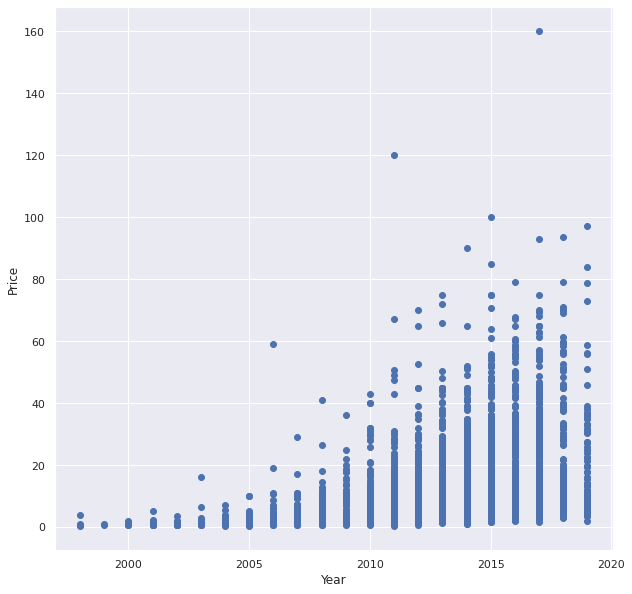

In [1581]:
plt.scatter(train_df.Year,train_df.Price)
plt.xlabel("Year")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

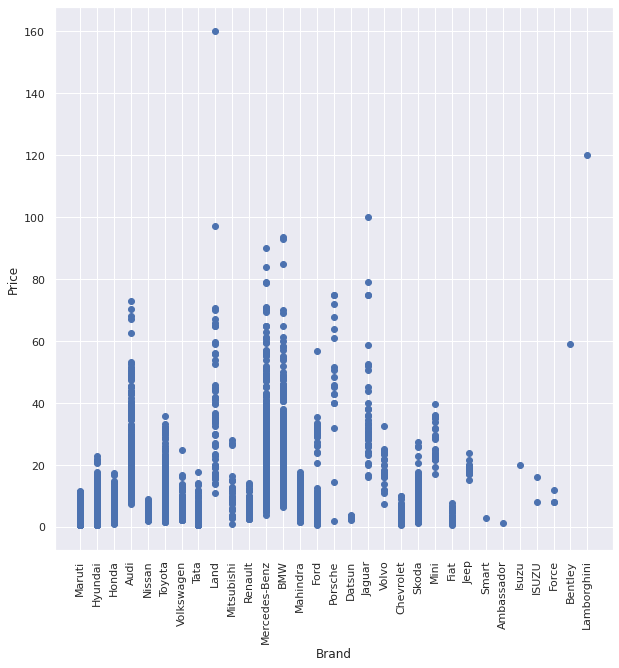

In [1582]:
plt.scatter(train_df.Brand,train_df.Price)
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

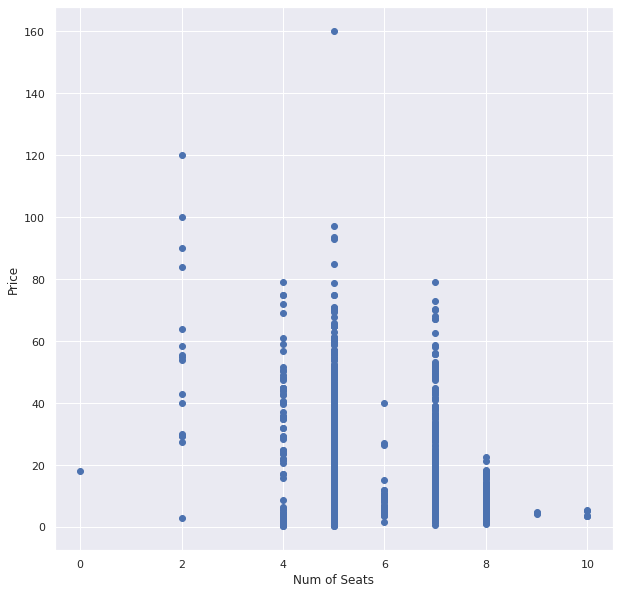

In [1583]:
plt.scatter(train_df.Seats, train_df.Price)
plt.xlabel("Num of Seats")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

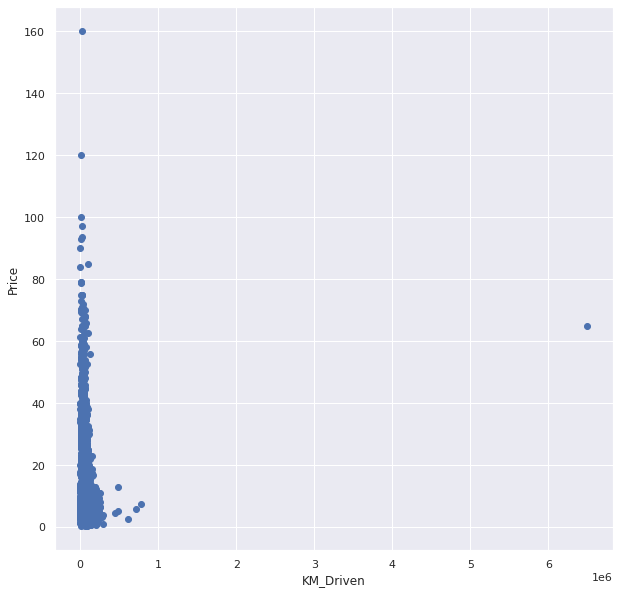

In [1584]:
plt.scatter(train_df.Kilometers_Driven, train_df.Price)
plt.xlabel("KM_Driven")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

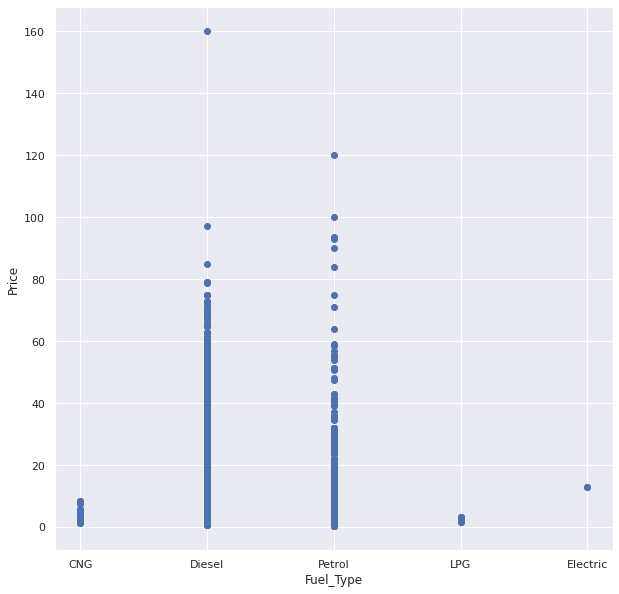

In [1585]:
plt.scatter(train_df.Fuel_Type,train_df.Price)
plt.xlabel("Fuel_Type")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

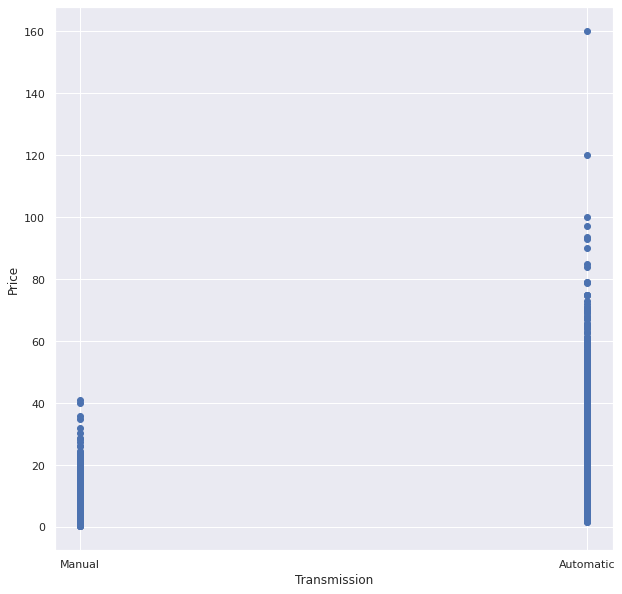

In [1586]:
plt.scatter(train_df.Transmission,train_df.Price)
plt.xlabel("Transmission")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

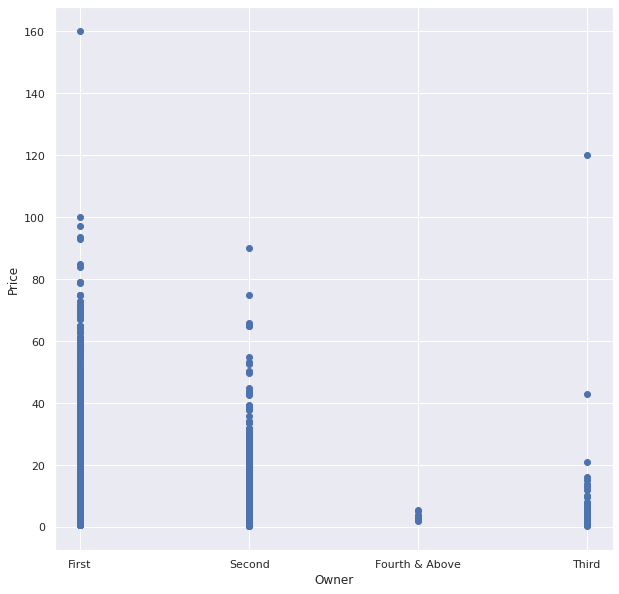

In [1587]:
plt.scatter(train_df.Owner_Type,train_df.Price)
plt.xlabel("Owner")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

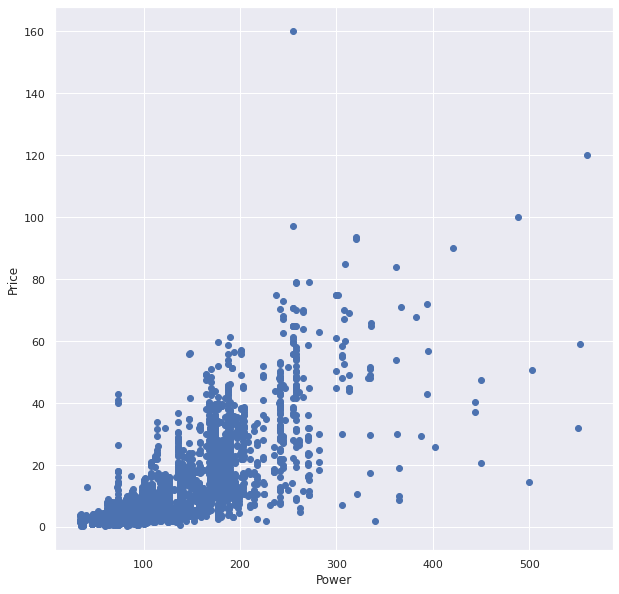

In [1588]:
plt.scatter(train_df.Power, train_df.Price)
plt.xlabel("Power")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

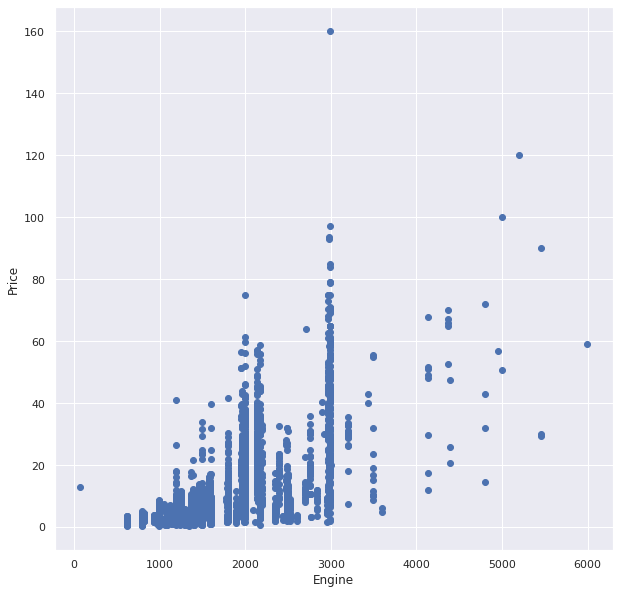

In [1589]:
plt.scatter(train_df.Engine, train_df.Price)
plt.xlabel("Engine")
plt.ylabel("Price")

<function matplotlib.pyplot.show>

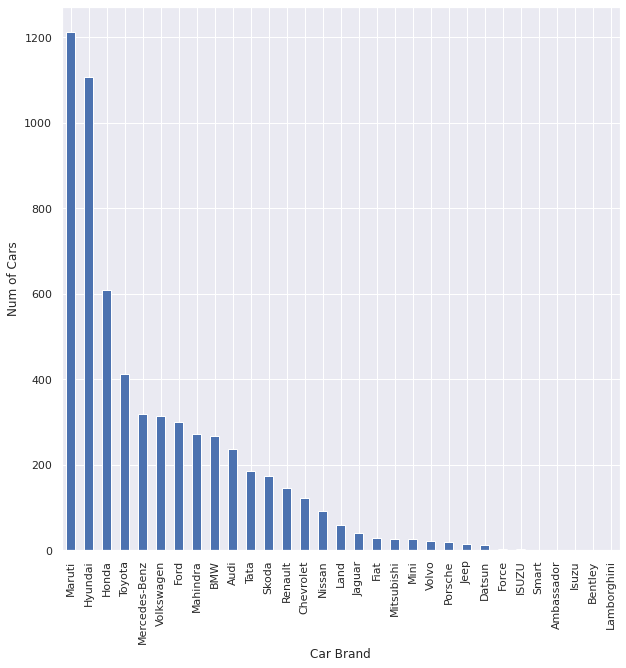

In [1590]:
train_df['Brand'].value_counts().plot(kind='bar')
plt.xlabel("Car Brand")
plt.ylabel("Num of Cars")
plt.show

<function matplotlib.pyplot.show>

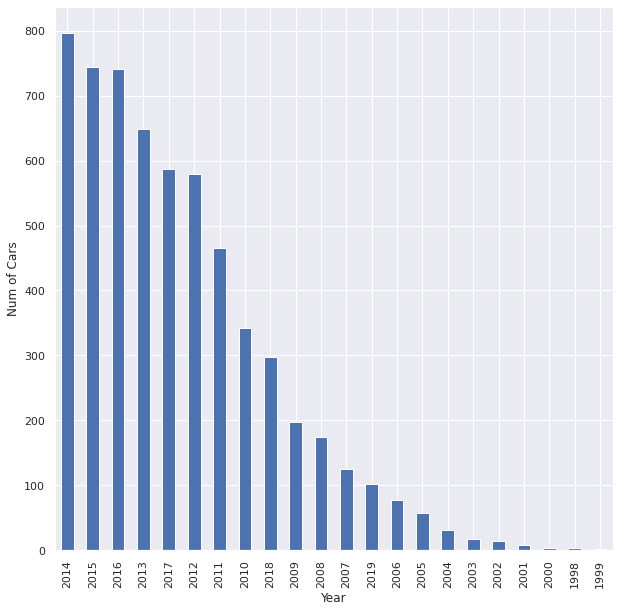

In [1591]:
train_df['Year'].value_counts().plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Num of Cars")
plt.show

In [1592]:
train_df['Fuel_Type'].value_counts().plot(kind='bar')
plt.xlabel("Fuel_Type")
plt.ylabel("Num of Cars")
plt.show

<function matplotlib.pyplot.show>

In [1593]:
train_df['Transmission'].value_counts().plot(kind='bar')
plt.xlabel("Transmission")
plt.ylabel("Num of Cars")
plt.show

<function matplotlib.pyplot.show>

<function matplotlib.pyplot.show>

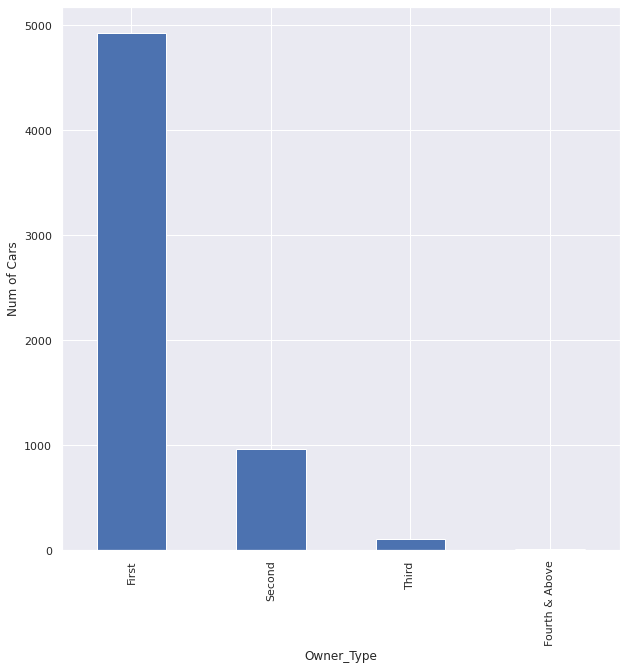

In [1594]:
train_df['Owner_Type'].value_counts().plot(kind='bar')
plt.xlabel("Owner_Type")
plt.ylabel("Num of Cars")
plt.show


In [1595]:
train_df['Seats'].value_counts().plot(kind='bar')
plt.xlabel("Num of seats")
plt.ylabel("Num of Cars")
plt.show

<function matplotlib.pyplot.show>

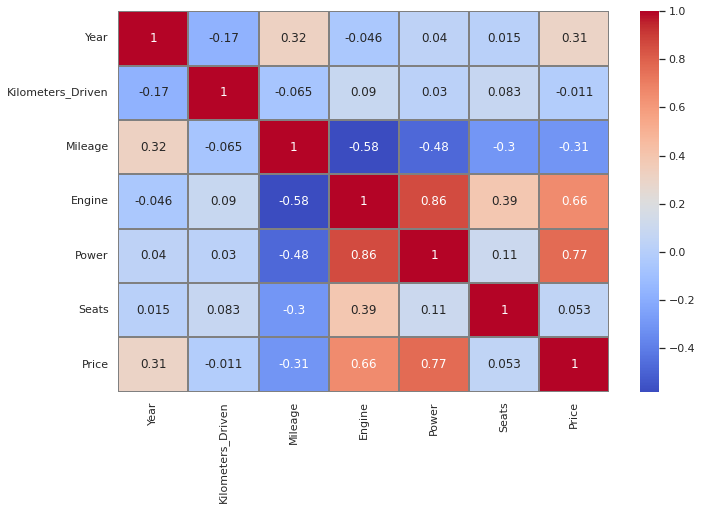

In [1596]:
#Correlation 
corrMatrix = train_df.corr()
plt.figure(figsize=(11,7))
sns.heatmap(corrMatrix, annot=True,cmap= 'coolwarm', linewidths=1, linecolor='GREY')
plt.show()

# 4. Feature Engineering 

REMOVAL OF OUTLIERS FROM TRANING SET

In [1597]:
sns.boxplot(x=train_df['Mileage'])
plt.show()

Outliers in Kilometers_Driven

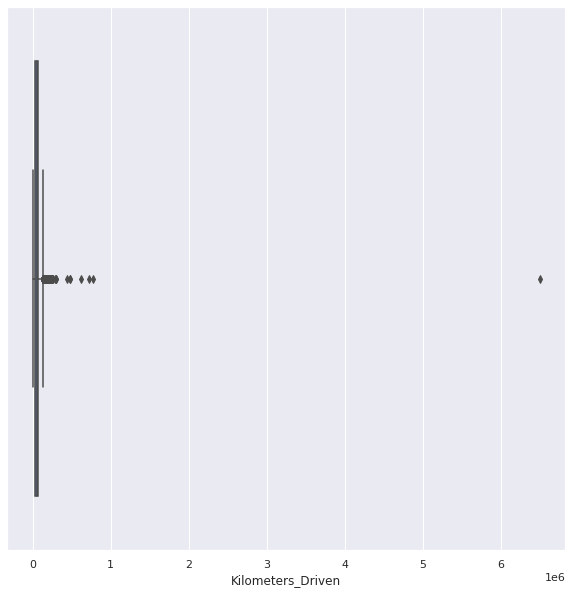

In [1598]:
sns.boxplot(x=train_df['Kilometers_Driven'])
plt.show()
#There are outliers in Kilometers_Driven

In [1599]:
#ul = upper limit
#ll = lower limit
#IQR = Interquartile Range

q1 = train_df.Kilometers_Driven.quantile(0.25)
q3 = train_df.Kilometers_Driven.quantile(0.75)
IQR = q3 - q1
ul = q3 + (IQR * 1.5)
ll = q1 - (IQR * 1.5)

In [1600]:
train_df[(train_df.Kilometers_Driven < ll)  | (train_df.Kilometers_Driven > ul)]

Location  Year  Kilometers_Driven Fuel_Type Transmission  \
29        Mumbai  2007             262000    Diesel       Manual   
64       Chennai  2016             178000    Diesel       Manual   
77       Chennai  2006             230000    Petrol       Manual   
154         Pune  2012             136997    Diesel    Automatic   
164        Kochi  2014             147898    Diesel       Manual   
...          ...   ...                ...       ...          ...   
5852     Chennai  2008             192000    Diesel       Manual   
5871        Pune  2009             180000    Diesel       Manual   
5914   Hyderabad  2003             132000    Diesel       Manual   
5953      Jaipur  2012             140000    Diesel       Manual   
5957  Coimbatore  2004             186679    Petrol       Manual   

          Owner_Type  Mileage  Engine   Power  Seats  Price   Brand  
29    Fourth & Above     12.8  2494.0  102.00    7.0   4.00  Toyota  
64             First     25.0  1396.0   69.00    5.0   2.50    Tata  
77             Third     12.4  1998.0  132.00    8.0   4.50  Toyota  
154            First     17.2  1968.0  138.10    5.0   8.50   Skoda  
164            First     22.7  1498.0   89.84    5.0   4.42    Ford  
...              ...      ...     ...     ...    ...    ...     ...  
5852           First     12.8  2494.0  102.00    8.0   6.85  Toyota  
5871           First     10.9  2499.0  143.00    7.0   7.50    Ford  
5914           First     18.7  1896.0   66.00    5.0   2.25   Skoda  
5953           First     20.0  1399.0   68.00    5.0   2.51    Ford  
5957          Second     13.0  1493.0  100.00    5.0   1.76   Honda  

[202 rows x 12 columns]

In [1601]:
train_df1 = train_df[(train_df.Kilometers_Driven > ll) & (train_df.Kilometers_Driven < ul)]
train_df1.shape

(5817, 12)

In [1602]:
sns.boxplot(x=train_df1['Kilometers_Driven'])
plt.show()

In [1603]:
x = np.log(train_df1['Kilometers_Driven'])
plt.hist(x,bins=24,rwidth=1)
plt.show()

Outliers in Engine

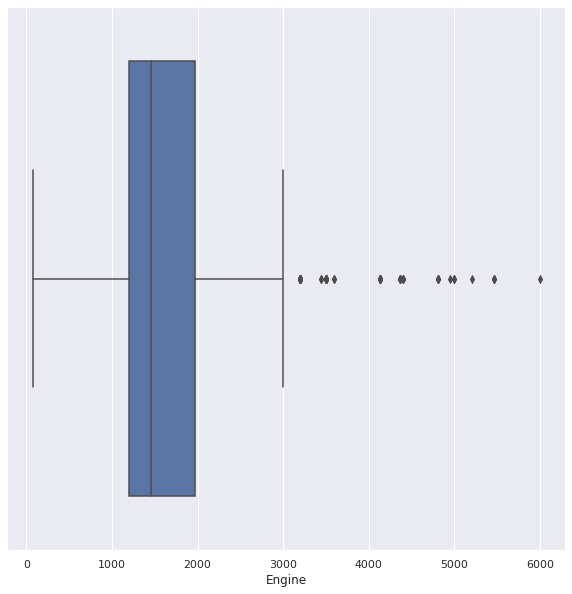

In [1604]:
sns.boxplot(x=train_df1['Engine'])
plt.show()
#There are outliers in Engine

In [1605]:
q1 = train_df1.Engine.quantile(0.25)
q3 = train_df1.Engine.quantile(0.75)
IQR = q3 - q1
ul = q3 + (IQR * 1.5)
ll = q1 - (IQR * 1.5)

In [1606]:
train_df1[(train_df1.Engine < ll)  | (train_df1.Engine > ul)]

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
70        Mumbai  2008              73000    Petrol    Automatic      First   
152      Kolkata  2010              35277    Petrol    Automatic      First   
459   Coimbatore  2016              51002    Diesel    Automatic      First   
586        Kochi  2014              79926    Diesel    Automatic      First   
589    Bangalore  2006              47088    Petrol    Automatic     Second   
693   Coimbatore  2016              22732    Petrol    Automatic      First   
703   Coimbatore  2017              50484    Diesel    Automatic      First   
798    Bangalore  2015              10000    Petrol    Automatic      First   
806   Coimbatore  2017              59636    Diesel    Automatic      First   
926    Hyderabad  2010              10000    Petrol       Manual      First   
1038   Bangalore  2011              55000    Diesel    Automatic      First   
1076   Hyderabad  2016              68000    Diesel    Automatic      First   
1093   Bangalore  2014              50000    Diesel    Automatic      First   
1352   Bangalore  2012              66538    Diesel    Automatic      First   
1430       Kochi  2018              30552    Diesel    Automatic      First   
1596       Delhi  2008              71000    Petrol    Automatic      First   
1724       Delhi  2017              38000    Diesel    Automatic      First   
1930      Mumbai  2007              55000    Petrol    Automatic      Third   
2100      Mumbai  2010              35000    Petrol    Automatic     Second   
2305      Mumbai  2011               8000    Petrol    Automatic      First   
2669  Coimbatore  2018              51530    Diesel    Automatic      First   
2681   Hyderabad  2010              54000    Petrol    Automatic      First   
2978  Coimbatore  2010              42400    Petrol    Automatic      Third   
3028  Coimbatore  2017              61108    Diesel    Automatic      First   
3065      Mumbai  2010              73000    Petrol    Automatic      First   
3079      Mumbai  2016              29000    Diesel    Automatic      First   
3115      Jaipur  2016              90000    Diesel    Automatic      First   
3196     Chennai  2019               9000    Diesel    Automatic      First   
3242   Bangalore  2012              63000    Diesel    Automatic     Second   
3341       Kochi  2010              50161    Petrol    Automatic      First   
3580   Hyderabad  2010              29000    Diesel    Automatic      First   
3999   Hyderabad  2012             125000    Petrol    Automatic      First   
4039      Mumbai  2011              82000    Petrol    Automatic     Second   
4136      Mumbai  2009              68001    Petrol    Automatic     Second   
4227     Chennai  2016              43000    Diesel    Automatic      First   
4342      Mumbai  2006             103000    Petrol    Automatic      First   
4388   Bangalore  2015              50000    Diesel    Automatic      First   
4451       Kochi  2018              21290    Petrol    Automatic      First   
4559       Delhi  2010              73000    Diesel    Automatic      First   
4627       Kochi  2010              65329    Petrol    Automatic      First   
4691   Bangalore  2014               3000    Petrol    Automatic     Second   
4722     Kolkata  2010              35000    Petrol    Automatic      First   
4821      Mumbai  2011               5900    Petrol    Automatic      First   
4869  Coimbatore  2012              84384    Diesel    Automatic      First   
4906   Hyderabad  2018              15000    Diesel    Automatic      First   
4938  Coimbatore  2015              56238    Diesel    Automatic      First   
5088  Coimbatore  2011              43686    Petrol    Automatic      First   
5278       Delhi  2018              12000    Diesel    Automatic      First   
5323     Chennai  2017              17000    Diesel    Automatic      First   
5341  Coimbatore  2016              65003    Diesel    Aut

In [1607]:
train_df2 = train_df1[(train_df1.Engine > ll) & (train_df1.Engine < ul)]
train_df2.shape

(5757, 12)

In [1608]:
sns.boxplot(x=train_df2['Engine'])
plt.show()

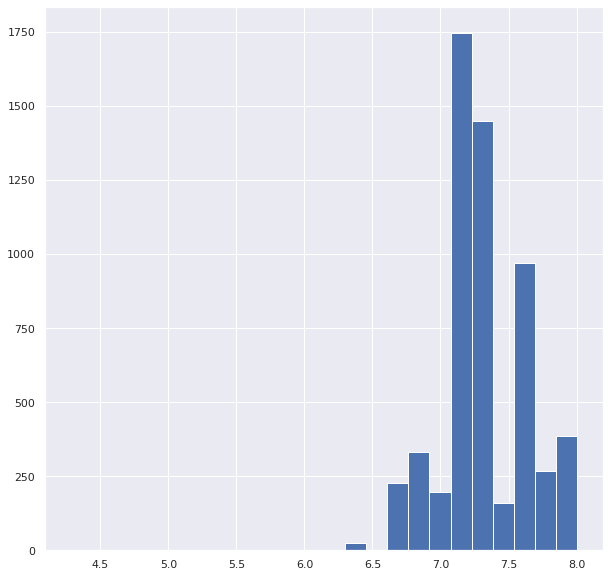

In [1609]:
x = np.log(train_df2['Engine'])
plt.hist(x,bins=24,rwidth=1)
plt.show()

Outliers in Power

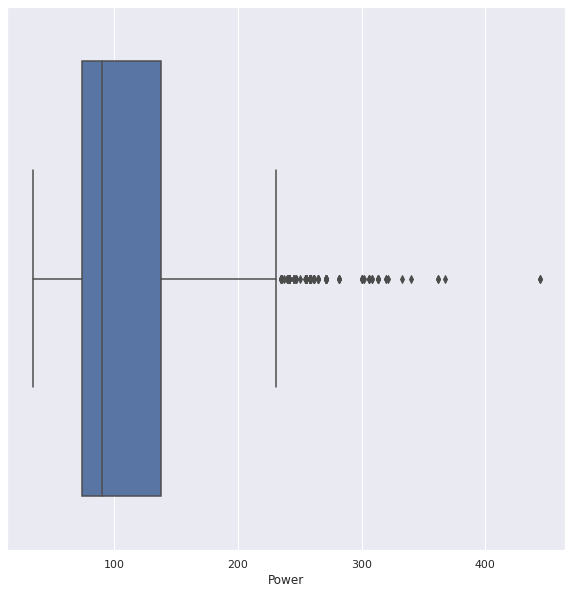

In [1610]:
sns.boxplot(x=train_df2['Power'])
plt.show()
#There are outliers in Power

In [1611]:
q1 = train_df2.Power.quantile(0.25)
q3 = train_df2.Power.quantile(0.75)
IQR = q3 - q1
ul = q3 + (IQR * 1.5)
ll = q1 - (IQR * 1.5)

In [1612]:
train_df2[(train_df2.Power < ll)  | (train_df2.Power > ul)]

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
38          Pune  2013              85000    Diesel    Automatic      First   
103      Kolkata  2010              30000    Diesel    Automatic      First   
107    Hyderabad  2011              78000    Diesel    Automatic     Second   
134      Kolkata  2017              13372    Petrol    Automatic      First   
148       Mumbai  2013              23000    Petrol    Automatic      First   
...          ...   ...                ...       ...          ...        ...   
5803     Chennai  2013             100000    Diesel    Automatic     Second   
5868       Kochi  2014              51240    Diesel    Automatic      First   
5927  Coimbatore  2018              29091    Diesel    Automatic      First   
5946   Bangalore  2016              16000    Diesel    Automatic      First   
6008   Hyderabad  2013              40000    Diesel    Automatic     Second   

      Mileage  Engine   Power  Seats  Price          Brand  
38      11.74  2987.0  254.80    5.0  28.00  Mercedes-Benz  
103     14.94  2967.0  241.40    5.0   9.80           Audi  
107     14.74  2993.0  270.90    5.0  24.00         Jaguar  
134     19.00  2996.0  362.07    2.0  54.00  Mercedes-Benz  
148     11.05  2894.0  444.00    4.0  37.00           Audi  
...       ...     ...     ...    ...    ...            ...  
5803    11.30  2987.0  254.80    7.0  38.00  Mercedes-Benz  
5868     8.20  2993.0  245.00    4.0  29.52            BMW  
5927    13.22  2967.0  241.40    5.0  45.52           Audi  
5946    14.69  2993.0  258.00    5.0  48.00            BMW  
6008    17.85  2967.0  300.00    4.0  45.00        Porsche  

[193 rows x 12 columns]

In [1613]:
final_tdf = train_df2[(train_df2.Power > ll) & (train_df2.Power < ul)]
final_tdf.shape

(5564, 12)

In [1614]:
final_tdf

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0         Mumbai  2010              72000       CNG       Manual      First   
1           Pune  2015              41000    Diesel       Manual      First   
2        Chennai  2011              46000    Petrol       Manual      First   
3        Chennai  2012              87000    Diesel       Manual      First   
4     Coimbatore  2013              40670    Diesel    Automatic     Second   
...          ...   ...                ...       ...          ...        ...   
6014       Delhi  2014              27365    Diesel       Manual      First   
6015      Jaipur  2015             100000    Diesel       Manual      First   
6016      Jaipur  2012              55000    Diesel       Manual     Second   
6017     Kolkata  2013              46000    Petrol       Manual      First   
6018   Hyderabad  2011              47000    Diesel       Manual      First   

      Mileage  Engine   Power  Seats  Price      Brand  
0       26.60   998.0   58.16    5.0   1.75     Maruti  
1       19.67  1582.0  126.20    5.0  12.50    Hyundai  
2       18.20  1199.0   88.70    5.0   4.50      Honda  
3       20.77  1248.0   88.76    7.0   6.00     Maruti  
4       15.20  1968.0  140.80    5.0  17.74       Audi  
...       ...     ...     ...    ...    ...        ...  
6014    28.40  1248.0   74.00    5.0   4.75     Maruti  
6015    24.40  1120.0   71.00    5.0   4.00    Hyundai  
6016    14.00  2498.0  112.00    8.0   2.90   Mahindra  
6017    18.90   998.0   67.10    5.0   2.65     Maruti  
6018    25.44   936.0   57.60    5.0   2.50  Chevrolet  

[5564 rows x 12 columns]

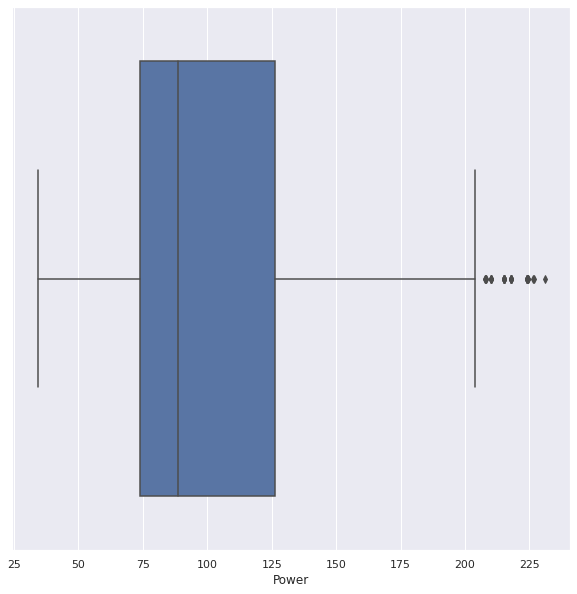

In [1615]:
sns.boxplot(x=final_tdf['Power'])
plt.show()

In [1616]:
x = np.log(final_tdf['Engine'])
plt.hist(x,bins=24,rwidth=1)
plt.show()

REMOVAL OF OUTLIERS FROM TEST SET

Outliers in Kilometers_Driven

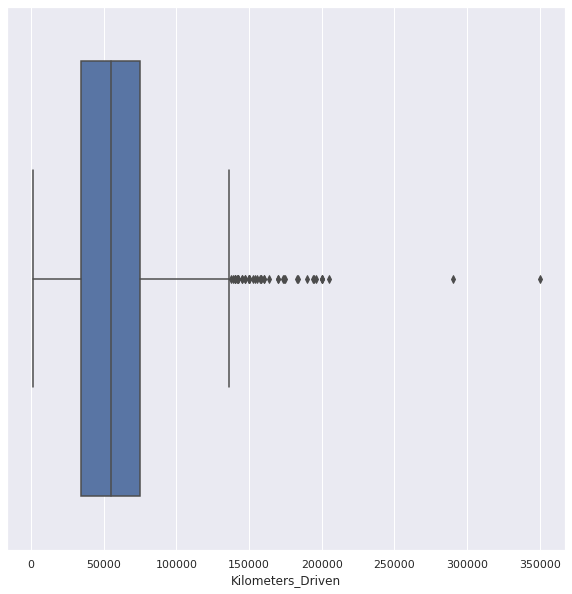

In [1617]:
sns.boxplot(x=test_df['Kilometers_Driven'])
plt.show()

In [1618]:
q1 = test_df.Kilometers_Driven.quantile(0.25)
q3 = test_df.Kilometers_Driven.quantile(0.75)
IQR = q3 - q1
ul = q3 + (IQR * 1.5)
ll = q1 - (IQR * 1.5)

In [1619]:
test_df[(test_df.Kilometers_Driven < ll)  | (test_df.Kilometers_Driven > ul)]

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
3     Hyderabad  2012             139000    Diesel       Manual      First   
17      Chennai  2009             140000    Diesel       Manual      First   
20         Pune  2016             200000    Diesel       Manual      First   
58      Chennai  2011             150000    Diesel       Manual     Second   
87        Kochi  2010             142299    Petrol       Manual      First   
142      Jaipur  2011             157301    Diesel       Manual     Second   
191     Chennai  2006             140000    Diesel       Manual     Second   
223     Chennai  2015             196000    Diesel       Manual     Second   
265   Hyderabad  2008             200000    Diesel       Manual     Second   
269   Hyderabad  2005             150000    Diesel       Manual     Second   
270      Jaipur  2009             145278    Diesel       Manual     Second   
291      Mumbai  2007             194000    Diesel       Manual      First   
332        Pune  2015             205000    Diesel       Manual      First   
350        Pune  2013             155550    Diesel       Manual      First   
353      Mumbai  2009             200000    Diesel       Manual      First   
366     Chennai  2011             150152    Diesel       Manual     Second   
383        Pune  2013             170000    Diesel       Manual     Second   
389        Pune  2013             153000    Petrol       Manual      First   
392     Chennai  2006             164000    Petrol       Manual     Second   
421        Pune  2015             174889    Diesel       Manual      First   
460        Pune  2011             141844    Diesel       Manual      First   
488      Jaipur  2013             160000    Diesel       Manual     Second   
538   Hyderabad  2008             194500    Diesel       Manual      First   
547   Hyderabad  2012             147000    Diesel       Manual      First   
612       Delhi  2014             150000    Diesel    Automatic      First   
624   Bangalore  2009             150000    Diesel    Automatic     Second   
633   Hyderabad  2013             142000    Diesel    Automatic      First   
687     Chennai  2012             158000    Petrol       Manual      First   
773     Chennai  2014             173000    Diesel       Manual     Second   
778        Pune  2010             183000    Diesel       Manual      First   
855        Pune  2015             174000    Diesel       Manual      First   
892   Bangalore  2009             140000    Diesel       Manual     Second   
900      Jaipur  2017             290000    Diesel       Manual      First   
902      Jaipur  2012             350000    Diesel       Manual      First   
924        Pune  2006             154000    Petrol       Manual      Third   
933      Jaipur  2017             145000    Petrol    Automatic      First   
952     Chennai  2015             142000    Diesel       Manual      First   
1028  Hyderabad  2007             158000    Petrol       Manual     Second   
1062     Jaipur  2008             150000    Diesel       Manual     Second   
1130     Mumbai  2006             183513    Diesel       Manual     Second   
1164  Hyderabad  2009             137711    Diesel       Manual      First   
1179  Hyderabad  2012             147202    Diesel    Automatic      First   
1181       Pune  2015             190000    Diesel       Manual      First   
1194  Hyderabad  2013             170000    Diesel       Manual      First   
1208    Chennai  2007             160000    Diesel       Manual     Second   

      Mileage  Engine   Power  Seats       Brand  
3     23.59    1364     74.00    5.0      Toyota  
17     13.8    1399     68.00    5.0        Ford  
20     23.2    1248     73.94    5.0      Maruti  
58    19.09    1396     69.00    5.0        Tata  
87    13.07    1368     88.76    5.0        Tata  
142   20.54    1598    103.60    5.0  Volkswagen  
191    13.5    1405     74.00    5.0        Tata  
223    12.

In [1620]:
test_df1 = test_df[(test_df.Kilometers_Driven >ll) & (test_df.Kilometers_Driven < ul)]
test_df1.shape

(1188, 11)

In [1621]:
sns.boxplot(x=test_df1['Kilometers_Driven'])
plt.show()

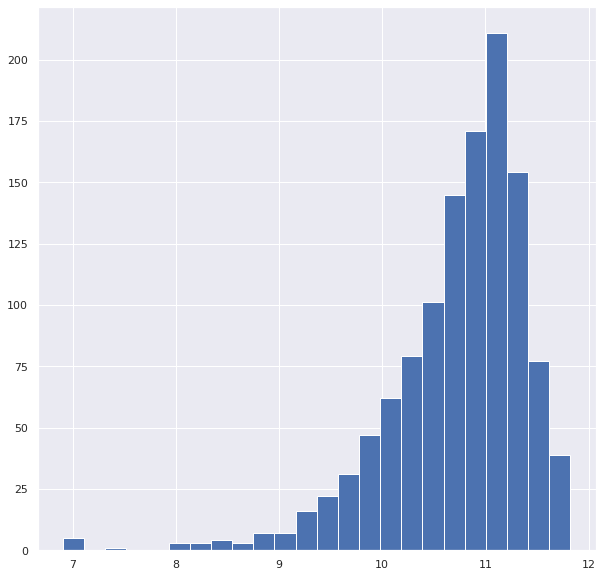

In [1622]:
x = np.log(test_df1['Kilometers_Driven'])
plt.hist(x,bins=24,rwidth=1)
plt.show()

Outliers in Power

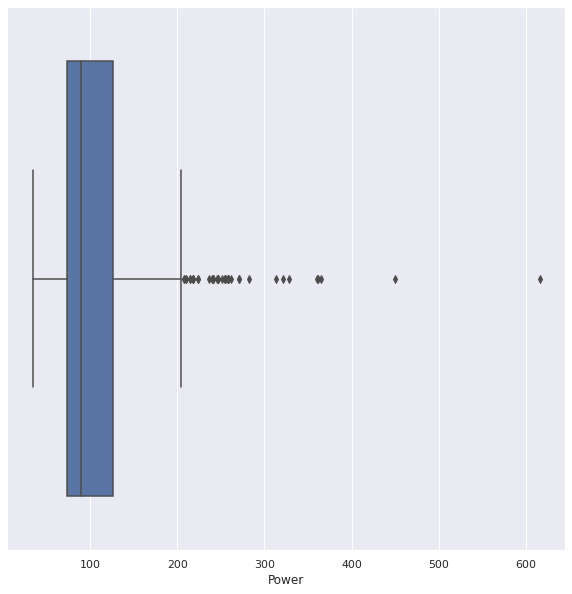

In [1623]:
sns.boxplot(x=test_df1['Power'])
plt.show()

In [1624]:
q1 = test_df.Power.quantile(0.25)
q3 = test_df.Power.quantile(0.75)
IQR = q3 - q1
ul = q3 + (IQR * 1.5)
ll = q1 - (IQR * 1.5)

In [1625]:
test_df[(test_df.Power < ll)  | (test_df.Power > ul)]

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
117        Kochi  2012              61665    Diesel    Automatic      First   
126    Bangalore  2016              26900    Diesel    Automatic      First   
165        Kochi  2015              69095    Diesel    Automatic      First   
167       Mumbai  2008              65000    Petrol    Automatic      Third   
185        Kochi  2013              66848    Diesel    Automatic      First   
193      Chennai  2017              16000    Diesel    Automatic      First   
202      Kolkata  2014              12000    Diesel    Automatic      First   
260   Coimbatore  2018              14730    Petrol    Automatic      First   
289      Chennai  2015              67000    Diesel    Automatic      First   
293   Coimbatore  2015              53093    Diesel    Automatic     Second   
335    Bangalore  2008              31200    Petrol    Automatic     Second   
369   Coimbatore  2014              58598    Diesel    Automatic      First   
415        Kochi  2012              89190    Diesel    Automatic     Second   
468       Mumbai  2009              49000    Petrol    Automatic     Second   
471       Mumbai  2013              60000    Diesel    Automatic      First   
496      Kolkata  2011              30342    Petrol    Automatic      First   
529    Bangalore  2009              92000    Petrol    Automatic      First   
550    Hyderabad  2011              76000    Diesel    Automatic      First   
602    Hyderabad  2013              88000    Diesel    Automatic      First   
613        Delhi  2015              33000    Diesel    Automatic      First   
634    Hyderabad  2011              70000    Diesel    Automatic      First   
645    Bangalore  2015              16000    Diesel    Automatic      First   
685    Hyderabad  2011              82000    Diesel    Automatic      First   
721    Bangalore  2014              43000    Diesel    Automatic     Second   
790        Delhi  2011              87000    Diesel    Automatic     Second   
805      Kolkata  2017              18366    Petrol    Automatic      First   
813    Hyderabad  2009              51000    Diesel    Automatic      First   
823      Kolkata  2012              14850    Petrol    Automatic      First   
827        Kochi  2014              33128    Diesel    Automatic      First   
889    Hyderabad  2011              53000    Diesel    Automatic      First   
891    Hyderabad  2008              67000    Diesel    Automatic      First   
941   Coimbatore  2018              18338    Petrol    Automatic      First   
945    Hyderabad  2016              50000    Diesel    Automatic      First   
956    Bangalore  2011              45000    Diesel    Automatic      First   
975        Kochi  2018              16409    Diesel    Automatic      First   
979       Mumbai  2008              69000    Diesel    Automatic      Third   
1038       Delhi  2009              64000    Petrol    Automatic      First   
1047   Ahmedabad  2009              99000    Petrol    Automatic     Second   
1056       Kochi  2015              58898    Diesel    Automatic      First   
1075   Bangalore  2017              18000    Diesel    Automatic      First   
1098       Kochi  2015              23742    Petrol    Automatic      First   
1105   Hyderabad  2010              78265    Diesel    Automatic      First   
1137       Kochi  2013              86107    Petrol    Automatic      First   
1161   Hyderabad  2007              99000    Petrol       Manual      First   
1179   Hyderabad  2012             147202    Diesel    Automatic      First   
1197       Delhi  2015              31000    Diesel    Automatic     Second   
1222       Delhi  2012              80000    Diesel    Automatic      First   

      Mileage  Engine   Power  Seats          Brand  
117   16.73    2993    218.00    5.0            BMW  
126    12.0    2987    224.00    7.0  Mercedes-Benz  
165    11.3    2987    254.80    7.0  Mercedes-Benz  

In [1626]:
final_test = test_df[(test_df.Power > ll) & (test_df.Power < ul)]
final_test.shape

(1186, 11)

In [1627]:
final_test

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0          Delhi  2014              40929       CNG       Manual      First   
1     Coimbatore  2013              54493    Petrol       Manual     Second   
2         Mumbai  2017              34000    Diesel       Manual      First   
3      Hyderabad  2012             139000    Diesel       Manual      First   
4         Mumbai  2014              29000    Petrol       Manual      First   
...          ...   ...                ...       ...          ...        ...   
1229   Hyderabad  2011              89411    Diesel       Manual      First   
1230      Mumbai  2015              59000    Petrol    Automatic      First   
1231     Kolkata  2012              28000    Diesel       Manual      First   
1232        Pune  2013              52262    Petrol    Automatic      Third   
1233       Kochi  2014              72443    Diesel    Automatic      First   

      Mileage  Engine   Power  Seats          Brand  
0     32.26     998     58.20    4.0         Maruti  
1      24.7     796     47.30    5.0         Maruti  
2     13.68    2393    147.80    7.0         Toyota  
3     23.59    1364     74.00    5.0         Toyota  
4      18.5    1197     82.85    5.0        Hyundai  
...       ...     ...     ...    ...            ...  
1229  20.54    1598    103.60    5.0     Volkswagen  
1230  17.21    1197    103.60    5.0     Volkswagen  
1231  23.08    1461     63.10    5.0         Nissan  
1232   17.2    1197    103.60    5.0     Volkswagen  
1233   10.0    2148    170.00    5.0  Mercedes-Benz  

[1186 rows x 11 columns]

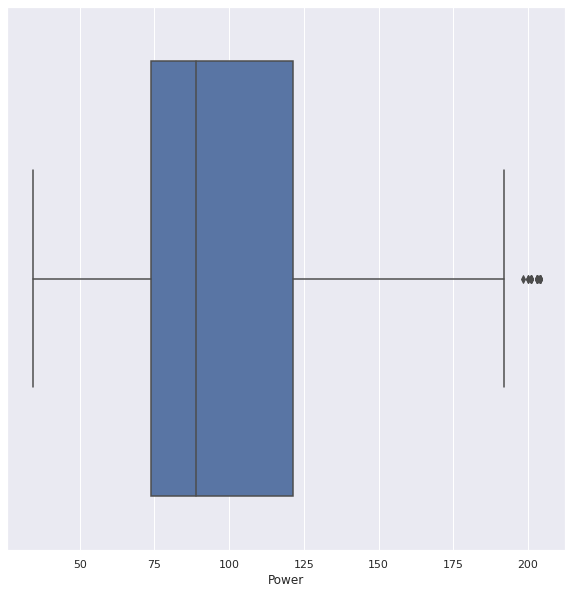

In [1628]:
sns.boxplot(x=final_test['Power'])
plt.show()

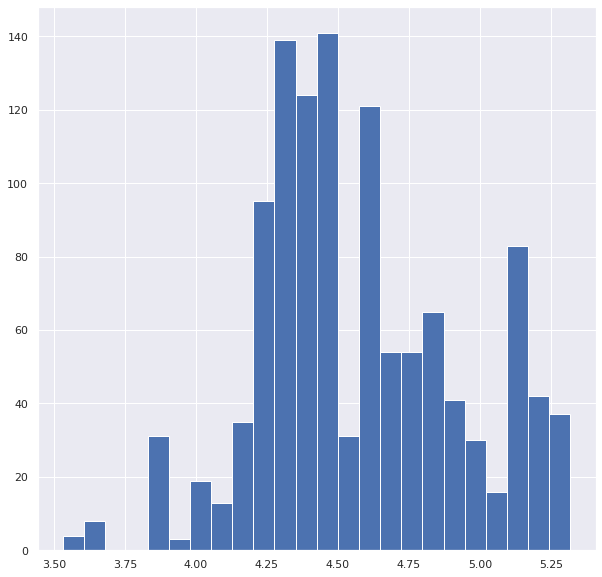

In [1629]:
x = np.log(final_test['Power'])
plt.hist(x,bins=24,rwidth=1)
plt.show()

FEATURE SCALING FOR TRAINING SET

In [1630]:
train_columns = ['Year','Kilometers_Driven','Mileage','Engine', 'Power', 'Seats', 'Price']
traindf = final_tdf[train_columns]

In [1631]:
 traindf.isna().sum()

Year                 0
Kilometers_Driven    0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [1632]:
traindf.head()
#Before scaling

Year  Kilometers_Driven  Mileage  Engine   Power  Seats  Price
0  2010              72000    26.60   998.0   58.16    5.0   1.75
1  2015              41000    19.67  1582.0  126.20    5.0  12.50
2  2011              46000    18.20  1199.0   88.70    5.0   4.50
3  2012              87000    20.77  1248.0   88.76    7.0   6.00
4  2013              40670    15.20  1968.0  140.80    5.0  17.74

In [1633]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
numeric = scaler.fit_transform(traindf)

In [1634]:
train_scaleddf = pd.DataFrame(data=numeric,columns=train_columns)
train_scaleddf.head()
#After scaling

Year  Kilometers_Driven   Mileage    Engine     Power  Seats     Price
0  0.571429           0.549030  0.793083  0.316365  0.121686  0.375  0.021543
1  0.809524           0.312079  0.586464  0.515887  0.467242  0.375  0.198323
2  0.619048           0.350297  0.542636  0.385036  0.276790  0.375  0.066765
3  0.666667           0.663683  0.619261  0.401777  0.277095  0.625  0.091432
4  0.714286           0.309557  0.453190  0.647762  0.541392  0.375  0.284493

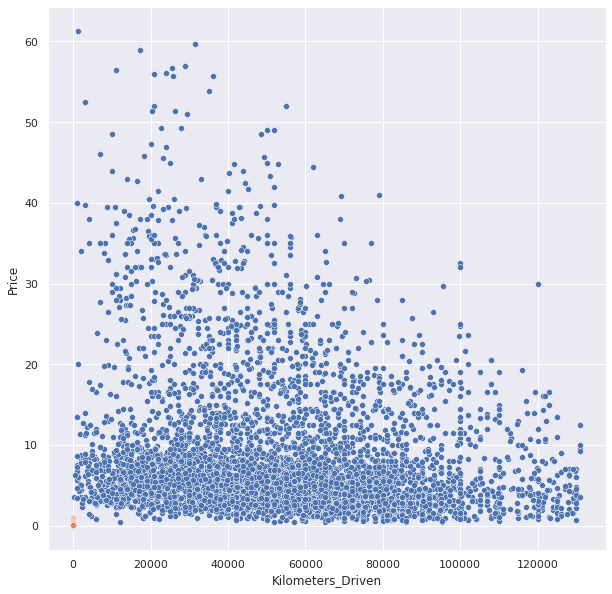

In [1635]:
sns.set(rc={'figure.figsize':(10,10)})
sns.scatterplot(data=final_tdf,x='Kilometers_Driven',y='Price')
sns.scatterplot(data = train_scaleddf,x='Kilometers_Driven',y='Price')
plt.show()

FEATURE SCALING FOR TESTING SET

In [1636]:
testcolumns = ['Year','Kilometers_Driven','Mileage','Power', 'Seats']
testdf = final_test[testcolumns]

In [1637]:
testdf.head()
#Before scaling

Year  Kilometers_Driven  Mileage   Power  Seats
0  2014              40929  32.26     58.20    4.0
1  2013              54493   24.7     47.30    5.0
2  2017              34000  13.68    147.80    7.0
3  2012             139000  23.59     74.00    5.0
4  2014              29000   18.5     82.85    5.0

In [1638]:
test_scaler = MinMaxScaler(feature_range=(0, 1))
test_numeric = scaler.fit_transform(testdf)

In [1639]:
test_scaleddf = pd.DataFrame(data=test_numeric,columns=testcolumns)
test_scaleddf.head()
#After scaling

Year  Kilometers_Driven   Mileage     Power     Seats
0  0.782609           0.114410  1.000000  0.141343  0.000000
1  0.739130           0.153275  0.765654  0.077150  0.166667
2  0.913043           0.094556  0.424055  0.669022  0.500000
3  0.695652           0.395415  0.731246  0.234393  0.166667
4  0.782609           0.080229  0.573466  0.286514  0.166667

In [1640]:
#Label encoding for categorical data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [1641]:
final_tdf['Brand'] = label_encoder.fit_transform(final_tdf['Brand'])
final_tdf['Location'] = label_encoder.fit_transform(final_tdf['Location'])
final_tdf['Fuel_Type'] = label_encoder.fit_transform(final_tdf['Fuel_Type'])
final_tdf['Transmission'] = label_encoder.fit_transform(final_tdf['Transmission'])
final_tdf['Owner_Type'] = label_encoder.fit_transform(final_tdf['Owner_Type'])


final_test['Brand'] = label_encoder.fit_transform(final_test['Brand'])
final_test['Location'] = label_encoder.fit_transform(final_test['Location'])
final_test['Fuel_Type'] = label_encoder.fit_transform(final_test['Fuel_Type'])
final_test['Transmission'] = label_encoder.fit_transform(final_test['Transmission'])
final_test['Owner_Type'] = label_encoder.fit_transform(final_test['Owner_Type'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [1642]:
final_tdf.head()

Location  Year  Kilometers_Driven  Fuel_Type  Transmission  Owner_Type  \
0         9  2010              72000          0             1           0   
1        10  2015              41000          1             1           0   
2         2  2011              46000          4             1           0   
3         2  2012              87000          1             1           0   
4         3  2013              40670          1             0           2   

   Mileage  Engine   Power  Seats  Price  Brand  
0    26.60   998.0   58.16    5.0   1.75     16  
1    19.67  1582.0  126.20    5.0  12.50      9  
2    18.20  1199.0   88.70    5.0   4.50      8  
3    20.77  1248.0   88.76    7.0   6.00     16  
4    15.20  1968.0  140.80    5.0  17.74      1

In [1643]:
final_test.head()

Location  Year  Kilometers_Driven  Fuel_Type  Transmission  Owner_Type  \
0         4  2014              40929          0             1           0   
1         3  2013              54493          3             1           2   
2         9  2017              34000          1             1           0   
3         5  2012             139000          1             1           0   
4         9  2014              29000          3             1           0   

   Mileage  Engine   Power  Seats  Brand  
0  32.26     998     58.20    4.0     15  
1   24.7     796     47.30    5.0     15  
2  13.68    2393    147.80    7.0     24  
3  23.59    1364     74.00    5.0     24  
4   18.5    1197     82.85    5.0      8

# 5. Training Model

In [1644]:
y = final_tdf.Price
X = final_tdf.drop(['Price'],axis=1)

In [1645]:
 from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.2)

In [1646]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

LinearRegression()

In [1647]:
LinearRegression()

LinearRegression()

In [1648]:
from sklearn.ensemble import RandomForestRegressor

trained_model = RandomForestRegressor(n_estimators=200)
trained_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

In [1649]:
 RandomForestRegressor(n_estimators=200)

RandomForestRegressor(n_estimators=200)

# 6. Prediction

In [1650]:
y_prediction = model.predict(X_valid)
y_prediction

array([ 5.97206166,  5.36749924,  1.31925042, ..., 16.93110054,
       -0.95686724, 10.17406442])

In [1651]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_prediction)))
print("R2 score : %f" % r2_score(y_valid,y_prediction))
print('MSE: ', metrics.mean_squared_error(y_valid, y_prediction))

Mean Absolute Error: 2.727582763713121
Root Mean Squared Error: 4.168757571170979
R2 score : 0.700948
MSE:  17.37853968719536


In [1652]:
y_predict = trained_model.predict(X_valid)
y_predict

array([ 3.9771 ,  3.51465,  1.8555 , ..., 14.08185,  2.58015,  7.94065])

In [1653]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_predict)))
print("R2 score : %f" % r2_score(y_valid,y_predict))

Mean Absolute Error: 1.0864498262418179
Mean Squared Error: 5.070049365572531
Root Mean Squared Error: 2.2516770118230838
R2 score : 0.912754


# 7. Evaluating your Model

In [1654]:
Ytrain_predicted = model.predict(X_train)
Ytest_predicted = model.predict(X_valid)
print("Train set accuracy: ",r2_score(y_train,ytrain_predicted))
print("Test set accuracy : ",r2_score(y_valid,ytest_predicted))

Train set accuracy:  -0.6569440552089814
Test set accuracy :  -0.7789704840719351


In [1655]:
Result = pd.DataFrame({"Actual Price":y_valid,"Predicted Price":y_predicted})
Result.head(100)

Actual Price  Predicted Price
5330          3.65         0.361535
4384          3.10        -1.785025
3305          2.30         8.624058
44            8.85         6.662673
5872          9.44        13.145439
...            ...              ...
1613          7.80        11.629014
1218          3.65        -3.135131
1183          2.45        -1.512043
3364          3.75         4.889406
5375          5.15         6.532955

[100 rows x 2 columns]

In [1656]:
Ytrain_predict = model1.predict(X_train)
Ytest_predict = model1.predict(X_valid)
print("Train set accuracy: ",r2_score(y_train,Ytrain_predict))
print("Test set accuracy : ",r2_score(y_valid,Ytest_predict))

Train set accuracy:  0.9727768580505958
Test set accuracy :  0.9709318842330488


In [1657]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_predict)))
print("R2 score : %f" % r2_score(y_valid,y_predict))

Mean Absolute Error: 1.0864498262418179
Mean Squared Error: 5.070049365572531
Root Mean Squared Error: 2.2516770118230838
R2 score : 0.912754


In [1658]:
End_Result = pd.DataFrame({"Actual Price":y_valid,"Predicted Price":Ytest_predict})
End_Result.head(100)

Actual Price  Predicted Price
5330          3.65          3.74365
4384          3.10          3.21150
3305          2.30          1.88790
44            8.85         11.36680
5872          9.44          9.36790
...            ...              ...
1613          7.80          7.67025
1218          3.65          3.50935
1183          2.45          2.37665
3364          3.75          3.97045
5375          5.15          5.26905

[100 rows x 2 columns]

# SUBMISSION DATE: 2nd April 2022